## Transfer learning con CNN

In [1]:
import cv2
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split

def cargar_dataset_imagenes_raw(root_path, image_size=(64, 64)):
    """
    Lee las imágenes y las devuelve en formato (N, Alto, Ancho)
    con valores 0-255 (Enteros). Ideal para LBP.
    """
    X_list = []
    y_list = []
    
    root = Path(root_path)
    print(f"📂 Escaneando imágenes en: {root.absolute()} ...")
    
    if not root.exists():
        print("❌ Error: La ruta no existe.")
        return np.array([]), np.array([])

    contador = 0
    
    for img_path in root.rglob('*.*'):
        if img_path.suffix.lower() not in ['.png', '.jpg', '.jpeg', '.bmp']:
            continue
            
        # --- 1. ETIQUETADO ---
        label = 1 if 'anomaly' in str(img_path).lower() else 0
            
        # --- 2. LECTURA (Escala de Grises) ---
        img = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE)
        
        if img is None: continue
        
        # --- 3. RESIZE (Obligatorio) ---
        img = cv2.resize(img, image_size)
        
        # --- 4. SIN NORMALIZACIÓN (CAMBIO AQUÍ) ---
        # Antes: img_norm = img.astype('float32') / 255.0
        # Ahora: Nos quedamos con la imagen tal cual (0-255)
        
        X_list.append(img)
        y_list.append(label)
        contador += 1

    # Convertimos la lista a un Array Numpy
    # Al no normalizar, se creará como uint8 (enteros), que ocupa 4 veces menos memoria RAM
    X_array = np.array(X_list)
    y_array = np.array(y_list)

    print(f"✅ Carga completa. {contador} imágenes procesadas.")
    return X_array, y_array

# --- EJECUCIÓN ---

ruta = "./ITD"
X_total, y_total = cargar_dataset_imagenes_raw(ruta, image_size=(64, 64))

# Verificación
print(f"\nForma de X_total: {X_total.shape}")
print(f"Tipo de dato: {X_total.dtype}") # Debería decir 'uint8'
print(f"Max valor pixel: {X_total.max()}") # Debería ser 255

# --- PARTICIÓN ---
X_train, X_temp, y_train, y_temp = train_test_split(
    X_total, y_total, test_size=0.3, random_state=42, stratify=y_total
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("-" * 30)
print(f"🔹 Train shape: {X_train.shape}")
print(f"🔹 Val shape:   {X_val.shape}")
print(f"🔹 Test shape:  {X_test.shape}")
print("-" * 30)

print(f"Train anomalies: {np.sum(y_train)}")
print(f"Val anomalies:   {np.sum(y_val)}")
print(f"Test anomalies:  {np.sum(y_test)}")

📂 Escaneando imágenes en: /workspace/OneDrive - UPNA/4º/Extracción del conocimiento/TrabajoGrupo/ITD ...
✅ Carga completa. 5878 imágenes procesadas.

Forma de X_total: (5878, 64, 64)
Tipo de dato: uint8
Max valor pixel: 255
------------------------------
🔹 Train shape: (4114, 64, 64)
🔹 Val shape:   (882, 64, 64)
🔹 Test shape:  (882, 64, 64)
------------------------------
Train anomalies: 675
Val anomalies:   145
Test anomalies:  145


## ResNet supervisada

DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/dill-0.3.9-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/looseversion-1.3.0-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/lightning_thunder-0.2.0.dev0-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/lightning_utilities-0.12.0.dev0-py3.12.egg is deprecated. pip 2

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


   Época 1/10 | Train Loss: 0.3813 | Val Loss: 0.3025
   Época 2/10 | Train Loss: 0.2591 | Val Loss: 0.2888
   Época 3/10 | Train Loss: 0.2333 | Val Loss: 0.2362
   Época 4/10 | Train Loss: 0.2131 | Val Loss: 0.2741
   Época 5/10 | Train Loss: 0.1864 | Val Loss: 0.2293
   Época 6/10 | Train Loss: 0.1812 | Val Loss: 0.2383
   Época 7/10 | Train Loss: 0.1684 | Val Loss: 0.2197
   Época 8/10 | Train Loss: 0.1826 | Val Loss: 0.2528
   Época 9/10 | Train Loss: 0.2092 | Val Loss: 0.2174
   Época 10/10 | Train Loss: 0.1749 | Val Loss: 0.2216

📝 Evaluando en Test Set...


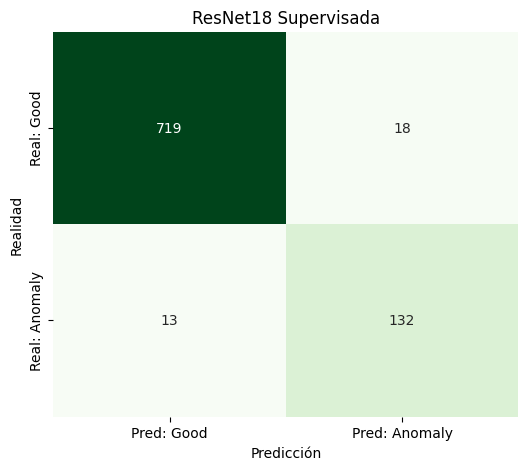

              precision    recall  f1-score   support

        Good       0.98      0.98      0.98       737
     Anomaly       0.88      0.91      0.89       145

    accuracy                           0.96       882
   macro avg       0.93      0.94      0.94       882
weighted avg       0.97      0.96      0.97       882

🔍 Defectos escapados: 13 de 145 (Recall: 91.03%)


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import models
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import sys
!{sys.executable} -m pip install seaborn
import seaborn as sns
import numpy as np

# --- 1. CONFIGURACIÓN ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🚀 Usando dispositivo: {device}")

# --- 2. DATASET PERSONALIZADO (Aquí hacemos la magia de 0-255 a 0-1) ---
class TextileDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        # 1. Obtener imagen (numpy array uint8 0-255) y etiqueta
        img = self.X[idx]
        label = self.y[idx]
        
        # 2. Asegurar canales (ResNet necesita 3 canales: R, G, B)
        # Si la imagen es (64, 64) -> Pasamos a (64, 64, 1) -> Repetimos a (64, 64, 3)
        if len(img.shape) == 2:
            img = np.expand_dims(img, axis=2)
            img = np.repeat(img, 3, axis=2)
        
        # 3. Transponer a formato PyTorch: (Alto, Ancho, Canales) -> (Canales, Alto, Ancho)
        img = img.transpose((2, 0, 1))
        
        # 4. A TENSOR Y NORMALIZAR (CRUCIAL: / 255.0)
        img_tensor = torch.tensor(img, dtype=torch.float32) / 255.0
        
        label_tensor = torch.tensor(label, dtype=torch.long)
        
        return img_tensor, label_tensor

# Crear Datasets y Loaders
train_dataset = TextileDataset(X_train, y_train)
val_dataset   = TextileDataset(X_val, y_val)   # Usamos Val para monitorear
test_dataset  = TextileDataset(X_test, y_test)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# --- 3. CALCULAR PESOS PARA EL DESBALANCEO ---
# Como hay pocas anomalías, les damos más importancia en la Loss Function
num_good = np.sum(y_train == 0)
num_anomaly = np.sum(y_train == 1)
weight_anomaly = num_good / num_anomaly
print(f"⚖️ Pesos calculados -> Good: 1.0 | Anomaly: {weight_anomaly:.2f}")

# Pasamos los pesos al dispositivo (GPU/CPU)
class_weights = torch.tensor([1.0, weight_anomaly], dtype=torch.float32).to(device)

# --- 4. MODELO (ResNet18) ---
print("🏗️ Cargando ResNet18...")
model = models.resnet18(pretrained=True)

# Congelar capas (Transfer Learning)
# Esto hace que entrene mucho más rápido y necesite menos datos
for param in model.parameters():
    param.requires_grad = False

# Reemplazar la última capa (Fully Connected)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2) # 2 salidas: Good (0) vs Anomaly (1)

model = model.to(device)

# --- 5. ENTRENAMIENTO ---
criterion = nn.CrossEntropyLoss(weight=class_weights) # <--- Aquí aplicamos los pesos
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

num_epochs = 10 

train_losses = []
val_losses = []

print(f"🔥 Iniciando entrenamiento por {num_epochs} épocas...")

for epoch in range(num_epochs):
    # --- FASE DE TRAIN ---
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    
    # --- FASE DE VALIDACIÓN ---
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            
    avg_val_loss = val_loss / len(val_loader)
    val_losses.append(avg_val_loss)
    
    print(f"   Época {epoch+1}/{num_epochs} | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")

# --- 6. EVALUACIÓN FINAL EN TEST ---
print("\n📝 Evaluando en Test Set...")
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Visualizar Resultados
cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Pred: Good', 'Pred: Anomaly'],
            yticklabels=['Real: Good', 'Real: Anomaly'])
plt.title('ResNet18 Supervisada')
plt.ylabel('Realidad')
plt.xlabel('Predicción')
plt.show()

print(classification_report(all_labels, all_preds, target_names=['Good', 'Anomaly']))

fallos = cm[1,0]
total_anom = cm[1,0] + cm[1,1]
print(f"🔍 Defectos escapados: {fallos} de {total_anom} (Recall: {cm[1,1]/total_anom:.2%})")

## Autoencoder

In [81]:
import cv2
import numpy as np
from pathlib import Path

def cargar_datos_separados_raw(root_path, image_size=(64, 64)):
    """
    Lee las carpetas originales 'train' y 'test' por separado.
    Devuelve datos RAW (0-255, uint8) sin mezclar.
    Ideal para Autoencoders donde Train debe ser puro.
    """
    # Listas para Entrenamiento (Solo Good)
    X_train = []
    y_train = [] # Deberían ser todos 0
    
    # Listas para Test (Good + Anomaly)
    X_test = []
    y_test = []
    
    root = Path(root_path)
    print(f"📂 Escaneando estructura original en: {root.absolute()} ...")
    
    if not root.exists():
        print("❌ Error: La ruta no existe.")
        return np.array([]), np.array([]), np.array([]), np.array([])

    contador_train = 0
    contador_test = 0
    
    for img_path in root.rglob('*.*'):
        if img_path.suffix.lower() not in ['.png', '.jpg', '.jpeg', '.bmp']:
            continue
        
        path_str = str(img_path).lower()
        
        # --- 1. IDENTIFICAR SPLIT (¿Viene de la carpeta train o test?) ---
        if 'train' in path_str:
            is_train = True
        elif 'test' in path_str:
            is_train = False
        else:
            continue # Si no está en ninguna, ignoramos
            
        # --- 2. IDENTIFICAR ETIQUETA ---
        label = 1 if 'anomaly' in path_str else 0
        
        # --- 3. LECTURA RAW (0-255) ---
        img = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE)
        if img is None: continue
        
        # Resize obligatorio
        img = cv2.resize(img, image_size)
        
        # NO NORMALIZAMOS (Lo dejamos en 0-255 uint8)
        
        # --- 4. GUARDAR EN SU SITIO ---
        if is_train:
            X_train.append(img)
            y_train.append(label)
            contador_train += 1
        else:
            X_test.append(img)
            y_test.append(label)
            contador_test += 1

    # Convertir a Numpy Arrays (uint8 por defecto si no normalizamos)
    X_train_arr = np.array(X_train)
    y_train_arr = np.array(y_train)
    X_test_arr = np.array(X_test)
    y_test_arr = np.array(y_test)

    print(f"✅ Carga finalizada.")
    print(f"   Train (Carpeta Original): {contador_train} imágenes.")
    print(f"   Test  (Carpeta Original): {contador_test} imágenes.")
    
    return X_train_arr, y_train_arr, X_test_arr, y_test_arr

# --- EJECUCIÓN PARA AUTOENCODER ---

ruta = "./ITD" 
X_train, y_train, X_test, y_test = cargar_datos_separados_raw(ruta, image_size=(64, 64))

print("\n--- DATOS LISTOS PARA AUTOENCODER ---")
print(f"X_train shape: {X_train.shape} (Debe ser uint8 0-255)")
print(f"X_test shape:  {X_test.shape}")

# Verificación de seguridad:
# Para el Autoencoder, X_train NO debe tener anomalías.
anomalias_en_train = np.sum(y_train == 1)
if anomalias_en_train > 0:
    print(f"\n⚠️ OJO: Hay {anomalias_en_train} anomalías en tu carpeta de Train.")
    print("Recomendación: Filtrarlas antes de entrenar el Autoencoder.")
else:
    print("\n✅ Perfecto: Tu carpeta Train está limpia (solo imágenes Good).")

📂 Escaneando estructura original en: /workspace/OneDrive - UPNA/4º/Extracción del conocimiento/TrabajoGrupo/ITD ...
✅ Carga finalizada.
   Train (Carpeta Original): 4391 imágenes.
   Test  (Carpeta Original): 1141 imágenes.

--- DATOS LISTOS PARA AUTOENCODER ---
X_train shape: (4391, 64, 64) (Debe ser uint8 0-255)
X_test shape:  (1141, 64, 64)

✅ Perfecto: Tu carpeta Train está limpia (solo imágenes Good).


In [82]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

# 1. FILTRADO: Quedarnos SOLO con los 'Good' (Label 0) para entrenar
indices_good = np.where(y_train == 0)[0]
X_train_good = X_train[indices_good]
y_train_good = y_train[indices_good] # Esto serán todo ceros

print(f"📊 Datos totales Train: {len(X_train)}")
print(f"✅ Datos para Autoencoder (Solo Good): {len(X_train_good)}")

# 2. DATASET (El mismo de antes, normalizando a 0-1)
class TextileDatasetAE(Dataset):
    def __init__(self, X):
        self.X = X
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        img = self.X[idx]
        
        # Asegurar canales (H, W) -> (H, W, 3) si hace falta
        if len(img.shape) == 2:
            img = np.expand_dims(img, axis=2)
            img = np.repeat(img, 3, axis=2)
            
        # Transponer (H, W, C) -> (C, H, W)
        img = img.transpose((2, 0, 1))
        
        # Normalizar 0-1 (CRUCIAL para que la red funcione bien)
        img_tensor = torch.tensor(img, dtype=torch.float32) / 255.0
        
        return img_tensor

# Creamos los Loaders
# Train: SOLO CON BUENAS
dataset_train_ae = TextileDatasetAE(X_train_good)
loader_train_ae = DataLoader(dataset_train_ae, batch_size=32, shuffle=True)

# Test: CON TODO (Buenas y Malas) para evaluar si pilla los fallos
dataset_test_ae = TextileDatasetAE(X_test) # Usamos X_test completo
loader_test_ae = DataLoader(dataset_test_ae, batch_size=1, shuffle=False) # Batch 1 para analizar foto a foto

📊 Datos totales Train: 4391
✅ Datos para Autoencoder (Solo Good): 4391


In [75]:
import torch.nn as nn

class ConvAutoencoder(nn.Module):
    def __init__(self):
        super(ConvAutoencoder, self).__init__()
        
        # --- ENCODER (Comprime) ---
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, 3, stride=2, padding=1),  # 64->32
            nn.BatchNorm2d(32),
            nn.ReLU(),
            
            nn.Conv2d(32, 64, 3, stride=2, padding=1), # 32->16
            nn.BatchNorm2d(64),
            nn.ReLU(),
            
            nn.Conv2d(64, 128, 3, stride=2, padding=1), # 16->8
            nn.BatchNorm2d(128),
            nn.ReLU(),
            
            nn.Conv2d(128, 256, 3, stride=2, padding=1), # 8->4 (Latent)
            nn.BatchNorm2d(256),
            nn.ReLU()
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, 3, stride=2, padding=1, output_padding=1), # 4->8
            nn.BatchNorm2d(128),
            nn.ReLU(),
            
            nn.ConvTranspose2d(128, 64, 3, stride=2, padding=1, output_padding=1), # 8->16
            nn.BatchNorm2d(64),
            nn.ReLU(),
            
            nn.ConvTranspose2d(64, 32, 3, stride=2, padding=1, output_padding=1), # 16->32
            nn.BatchNorm2d(32),
            nn.ReLU(),
            
            nn.ConvTranspose2d(32, 3, 3, stride=2, padding=1, output_padding=1), # 32->64
            nn.Sigmoid() # Salida 0-1
        )
        
    def forward(self, x):
        latent_code = self.encoder(x)
        reconstructed = self.decoder(latent_code)
        return reconstructed

# Inicializar modelo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_ae = ConvAutoencoder().to(device)
print(model_ae)

ConvAutoencoder(
  (encoder): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (10): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(256, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    

In [76]:
import torch.optim as optim

# Configuración
criterion = nn.MSELoss()
optimizer = optim.AdamW(model_ae.parameters(), lr=0.001, weight_decay=0.0001)
num_epochs = 15

print("Entrenando Autoencoder (Aprendiendo a dibujar telas perfectas)...")

for epoch in range(num_epochs):
    model_ae.train()
    running_loss = 0.0
    
    for img in loader_train_ae:
        img = img.to(device)
        
        # 1. Forward
        output = model_ae(img)
        
        # 2. Loss: Comparamos SALIDA vs ENTRADA (Queremos que sean iguales)
        loss = criterion(output, img)
        
        # 3. Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    print(f"   Época {epoch+1}/{num_epochs} | Error de reconstrucción: {running_loss/len(loader_train_ae):.6f}")

print("Entrenamiento finalizado.")

Entrenando Autoencoder (Aprendiendo a dibujar telas perfectas)...
   Época 1/15 | Error de reconstrucción: 0.019537
   Época 2/15 | Error de reconstrucción: 0.004404
   Época 3/15 | Error de reconstrucción: 0.003010
   Época 4/15 | Error de reconstrucción: 0.003066
   Época 5/15 | Error de reconstrucción: 0.002971
   Época 6/15 | Error de reconstrucción: 0.002515
   Época 7/15 | Error de reconstrucción: 0.002288
   Época 8/15 | Error de reconstrucción: 0.002244
   Época 9/15 | Error de reconstrucción: 0.002233
   Época 10/15 | Error de reconstrucción: 0.002157
   Época 11/15 | Error de reconstrucción: 0.002152
   Época 12/15 | Error de reconstrucción: 0.002072
   Época 13/15 | Error de reconstrucción: 0.002221
   Época 14/15 | Error de reconstrucción: 0.002083
   Época 15/15 | Error de reconstrucción: 0.002103
Entrenamiento finalizado.


DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/lightning_utilities-0.12.0.dev0-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/dill-0.3.9-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/looseversion-1.3.0-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/lightning_thunder-0.2.0.dev0-py3.12.egg is deprecated. pip 2

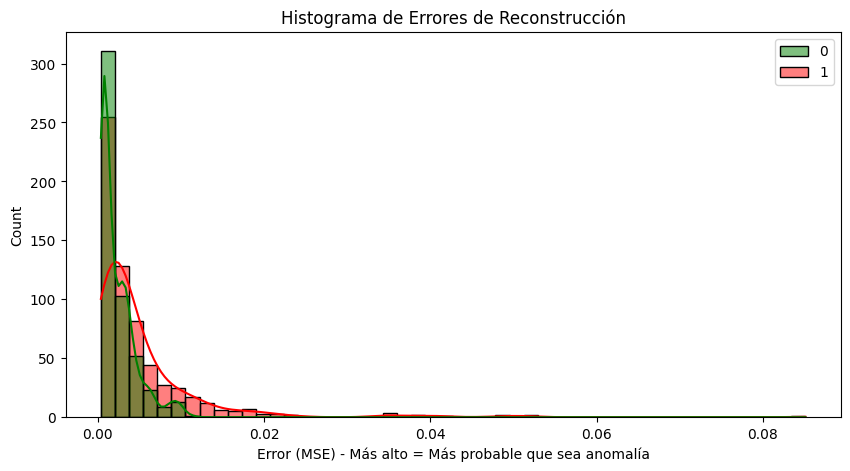

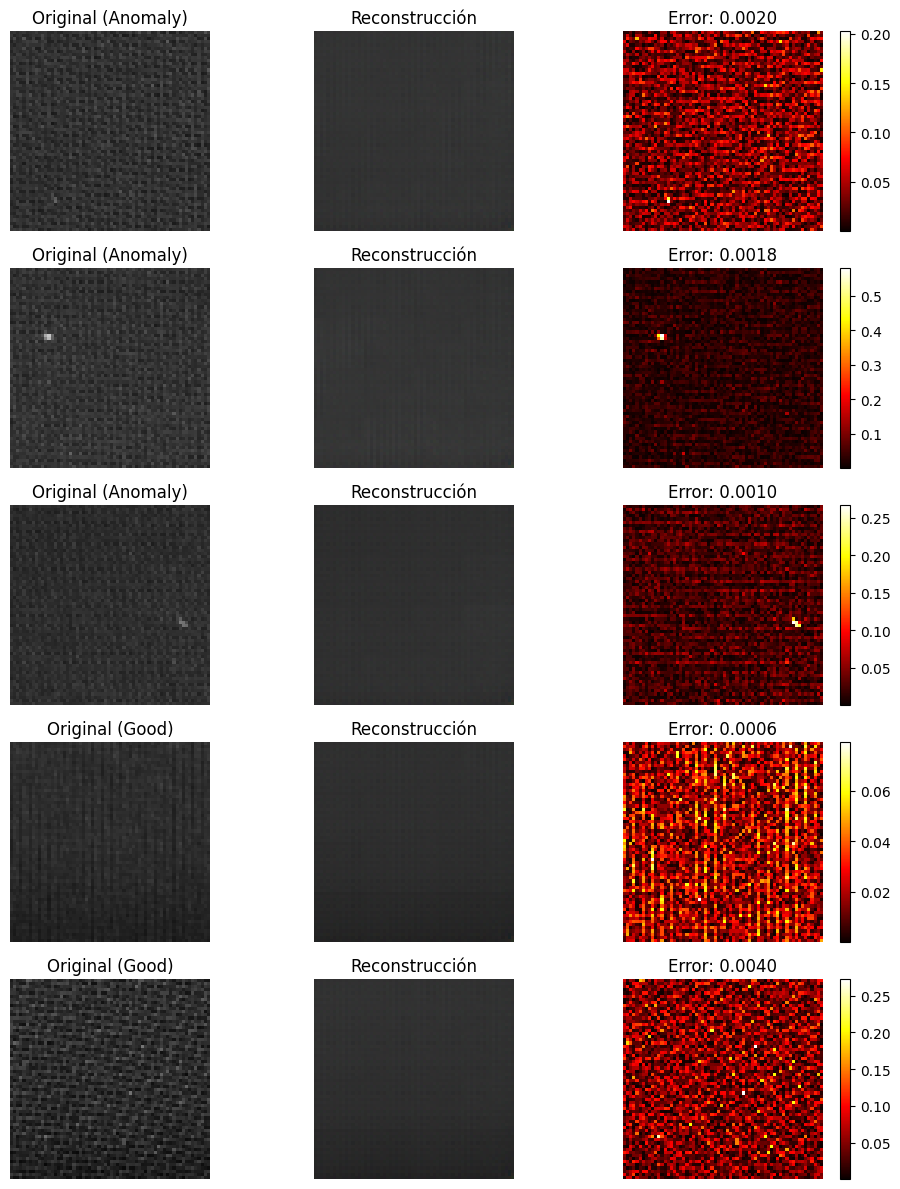

In [77]:
import matplotlib.pyplot as plt
import sys
!{sys.executable} -m pip install seaborn
import seaborn as sns

model_ae.eval()
errores = []
etiquetas_reales = []

# Vamos a guardar algunas imágenes para visualizarlas luego
ejemplos_visuales = [] 

print("Evaluando Test Set...")

with torch.no_grad():
    for i, img in enumerate(loader_test_ae):
        img = img.to(device)
        
        # Reconstruir
        recon = model_ae(img)
        
        # Calcular error de esta imagen específica
        # (img - recon)^2 -> Media de todos los píxeles
        loss = criterion(recon, img)
        error_val = loss.item()
        
        errores.append(error_val)
        etiquetas_reales.append(y_test[i]) # Guardamos si era 0 o 1 para comparar
        
        # Guardar un par de ejemplos (uno bueno y uno malo)
        if len(ejemplos_visuales) < 5:
            if (y_test[i] == 1 and len([x for x in ejemplos_visuales if x[0]==1]) < 3) or \
               (y_test[i] == 0 and len([x for x in ejemplos_visuales if x[0]==0]) < 2):
                # Guardamos: (label, original, reconstruccion, error)
                ejemplos_visuales.append((y_test[i], img.cpu(), recon.cpu(), error_val))

# --- VISUALIZACIÓN ---

# 1. Distribución de errores
plt.figure(figsize=(10, 5))
sns.histplot(x=errores, hue=etiquetas_reales, kde=True, palette={0: 'green', 1: 'red'}, bins=50)
plt.title("Histograma de Errores de Reconstrucción")
plt.xlabel("Error (MSE) - Más alto = Más probable que sea anomalía")
plt.show()

# 2. Ver las reconstrucciones
fig, axes = plt.subplots(len(ejemplos_visuales), 3, figsize=(10, 12))
for i, (lbl, orig, rec, err) in enumerate(ejemplos_visuales):
    # Original
    axes[i, 0].imshow(orig.squeeze().permute(1, 2, 0).numpy())
    axes[i, 0].set_title(f"Original ({'Anomaly' if lbl==1 else 'Good'})")
    axes[i, 0].axis('off')
    
    # Reconstrucción
    axes[i, 1].imshow(rec.squeeze().permute(1, 2, 0).numpy())
    axes[i, 1].set_title(f"Reconstrucción")
    axes[i, 1].axis('off')
    
    # Diferencia (Mapa de Calor del Error)
    # Calculamos la diferencia absoluta y la promediamos en los canales de color
    diff = torch.abs(orig - rec).squeeze().mean(dim=0).numpy()
    im = axes[i, 2].imshow(diff, cmap='hot')
    axes[i, 2].set_title(f"Error: {err:.4f}")
    axes[i, 2].axis('off')
    plt.colorbar(im, ax=axes[i, 2])

plt.tight_layout()
plt.show()

Calculando el umbral óptimo para la Matriz de Confusión...
Umbral de corte óptimo detectado: 0.0010


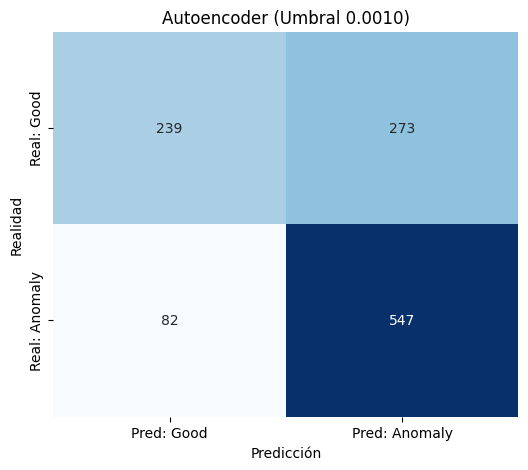


--- RESULTADOS AUTOENCODER ---
              precision    recall  f1-score   support

        Good       0.74      0.47      0.57       512
     Anomaly       0.67      0.87      0.76       629

    accuracy                           0.69      1141
   macro avg       0.71      0.67      0.66      1141
weighted avg       0.70      0.69      0.67      1141

Defectos escapados: 82 de 629
Recall (Capacidad de detectar fallos): 86.96%


In [78]:
from sklearn.metrics import roc_curve, confusion_matrix, classification_report, precision_recall_curve
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print("Calculando el umbral óptimo para la Matriz de Confusión...")

# 1. Encontrar el MEJOR Umbral automáticamente (Usando Curva ROC)
# Buscamos el punto que maximiza la diferencia entre Tasa de Verdaderos Positivos y Falsos Positivos
fpr, tpr, thresholds = roc_curve(etiquetas_reales, errores)
optimal_idx = np.argmax(tpr - fpr)
best_threshold = thresholds[optimal_idx]

print(f"Umbral de corte óptimo detectado: {best_threshold:.4f}")

# 2. Convertir errores a predicciones (0 o 1) usando ese umbral
preds_optimos = [1 if e > best_threshold else 0 for e in errores]

# 3. Generar Matriz de Confusión
cm = confusion_matrix(etiquetas_reales, preds_optimos)

# Visualizar
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Pred: Good', 'Pred: Anomaly'],
            yticklabels=['Real: Good', 'Real: Anomaly'])
plt.title(f'Autoencoder (Umbral {best_threshold:.4f})')
plt.ylabel('Realidad')
plt.xlabel('Predicción')
plt.show()

# 4. Reporte y Recall
print("\n--- RESULTADOS AUTOENCODER ---")
print(classification_report(etiquetas_reales, preds_optimos, target_names=['Good', 'Anomaly']))

fallos = cm[1, 0]
total_anom = cm[1, 0] + cm[1, 1]
recall = cm[1, 1] / total_anom

print(f"Defectos escapados: {fallos} de {total_anom}")
print(f"Recall (Capacidad de detectar fallos): {recall:.2%}")

## Autoencoder optimizado

In [66]:
import torch
!{sys.executable} -m pip install torchmetrics
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
# Necesitamos instalar esto para la Loss de SSIM fácil
# !pip install torchmetrics
from torchmetrics.image import StructuralSimilarityIndexMeasure

# --- 1. ARQUITECTURA MEJORADA (Con BatchNorm y LeakyRelu) ---
class ProAutoencoder(nn.Module):
    def __init__(self):
        super(ProAutoencoder, self).__init__()
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, 3, stride=2, padding=1),  # 64->32
            nn.BatchNorm2d(32),
            nn.LeakyReLU(0.2),
            
            nn.Conv2d(32, 64, 3, stride=2, padding=1), # 32->16
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2),
            
            nn.Conv2d(64, 128, 3, stride=2, padding=1), # 16->8
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),
            
            nn.Conv2d(128, 256, 3, stride=2, padding=1), # 8->4 (Latent)
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2)
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, 3, stride=2, padding=1, output_padding=1), # 4->8
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),
            
            nn.ConvTranspose2d(128, 64, 3, stride=2, padding=1, output_padding=1), # 8->16
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2),
            
            nn.ConvTranspose2d(64, 32, 3, stride=2, padding=1, output_padding=1), # 16->32
            nn.BatchNorm2d(32),
            nn.LeakyReLU(0.2),
            
            nn.ConvTranspose2d(32, 3, 3, stride=2, padding=1, output_padding=1), # 32->64
            nn.Sigmoid() # Salida 0-1
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# --- 2. CONFIGURACIÓN ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_pro = ProAutoencoder().to(device)

# Definimos la Loss Compuesta
l1_criterion = nn.L1Loss()
ssim_metric = StructuralSimilarityIndexMeasure(data_range=1.0).to(device)

optimizer = optim.Adam(model_pro.parameters(), lr=0.0005) # Learning rate bajito para precisión

# --- 3. ENTRENAMIENTO (Solo con Train Good) ---
# Asumimos que loader_train_ae ya está cargado (solo imgs buenas)
print("🔥 Entrenando Autoencoder PRO (L1 + SSIM)...")
epochs = 20

for epoch in range(epochs):
    model_pro.train()
    total_loss = 0
    
    for img in loader_train_ae:
        img = img.to(device)
        
        recon = model_pro(img)
        
        # LOSS MIXTA:
        # L1 cuida el color y brillo
        loss_l1 = l1_criterion(recon, img)
        # SSIM cuida la textura (devuelve 1 si es igual, queremos minimizar 1 - SSIM)
        ssim_val = ssim_metric(recon, img)
        loss_ssim = 1 - ssim_val
        
        # Balance: 80% L1, 20% Textura (Ajustable)
        loss = (0.8 * loss_l1) + (0.2 * loss_ssim)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        
    print(f"   Época {epoch+1} | Loss: {total_loss/len(loader_train_ae):.6f} (SSIM avg: {ssim_val.item():.4f})")

# Para evaluar, usa el mismo código de visualización de antes
# El error score será L1 + (1-SSIM)

DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/dill-0.3.9-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/looseversion-1.3.0-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/lightning_thunder-0.2.0.dev0-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/lightning_utilities-0.12.0.dev0-py3.12.egg is deprecated. pip 2

🕵️ Evaluando Autoencoder PRO (Calculando scores L1 + SSIM)...
⚖️ Umbral óptimo calculado: 0.03367


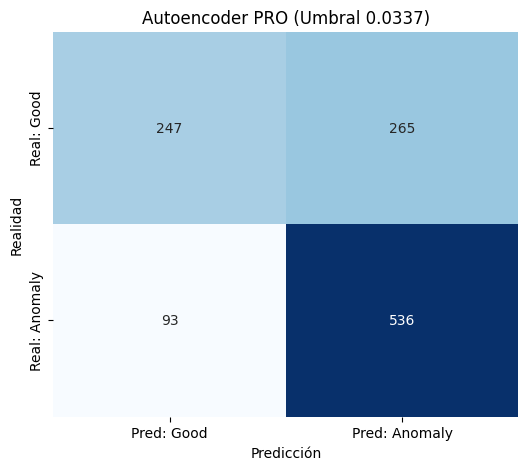


--- RESULTADOS AUTOENCODER PRO ---
              precision    recall  f1-score   support

        Good       0.73      0.48      0.58       512
     Anomaly       0.67      0.85      0.75       629

    accuracy                           0.69      1141
   macro avg       0.70      0.67      0.66      1141
weighted avg       0.69      0.69      0.67      1141

Defectos escapados: 93 de 629
Recall (Capacidad de detectar fallos): 85.21%


In [68]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, classification_report, confusion_matrix
# Asegúrate de tener torchmetrics instalado (pip install torchmetrics)
from torchmetrics.image import StructuralSimilarityIndexMeasure

# --- 1. EVALUAR EL TEST SET CON AUTOENCODER PRO ---
print("🕵️ Evaluando Autoencoder PRO (Calculando scores L1 + SSIM)...")

model_pro.eval()
l1_crit = torch.nn.L1Loss()
ssim_metric = StructuralSimilarityIndexMeasure(data_range=1.0).to(device)

errores_pro = []
etiquetas_reales = [] # Usaremos y_test directamente, pero por seguridad lo reconstruimos

with torch.no_grad():
    # Iteramos por el loader de test (que tiene las imágenes normalizadas)
    # y por y_test a la vez para tener la etiqueta
    for i, img_batch in enumerate(loader_test_ae):
        img = img_batch.to(device)
        
        # Reconstruir
        recon = model_pro(img)
        
        # Calcular el Score de Anomalía (Igual que en el entrenamiento)
        loss_l1 = l1_crit(recon, img)
        ssim_val = ssim_metric(recon, img)
        loss_ssim = 1 - ssim_val
        
        # Score final (cuanto más alto, más error = más anomalía)
        score = (0.8 * loss_l1) + (0.2 * loss_ssim)
        
        errores_pro.append(score.item())
        etiquetas_reales.append(y_test[i])

# --- 2. CALCULAR UMBRAL ÓPTIMO (ROC CURVE) ---
fpr, tpr, thresholds = roc_curve(etiquetas_reales, errores_pro)
optimal_idx = np.argmax(tpr - fpr)
best_threshold = thresholds[optimal_idx]

print(f"⚖️ Umbral óptimo calculado: {best_threshold:.5f}")

# Generar predicciones finales (0 o 1)
preds_optimos = [1 if e > best_threshold else 0 for e in errores_pro]

# Creación de la matriz de confusión
cm = confusion_matrix(etiquetas_reales, preds_optimos)

# --- 3. VISUALIZACIÓN (TU CÓDIGO) ---
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Pred: Good', 'Pred: Anomaly'],
            yticklabels=['Real: Good', 'Real: Anomaly'])
plt.title(f'Autoencoder PRO (Umbral {best_threshold:.4f})')
plt.ylabel('Realidad')
plt.xlabel('Predicción')
plt.show()

# 4. Reporte y Recall
print("\n--- RESULTADOS AUTOENCODER PRO ---")
print(classification_report(etiquetas_reales, preds_optimos, target_names=['Good', 'Anomaly']))

fallos = cm[1, 0]
total_anom = cm[1, 0] + cm[1, 1]
recall = cm[1, 1] / total_anom

print(f"Defectos escapados: {fallos} de {total_anom}")
print(f"Recall (Capacidad de detectar fallos): {recall:.2%}")

## PatchScore

🧠 Extrayendo características de TRAIN para PatchCore...


100%|████████████████████████████████████████████████████████████████████████████████| 138/138 [00:00<00:00, 249.44it/s]


✅ Memoria creada. Vectores almacenados: (6998, 256)
🔍 Entrenando KNN...
🕵️ Evaluando en TEST...


100%|██████████████████████████████████████████████████████████████████████████████| 1141/1141 [00:08<00:00, 134.76it/s]


⚖️ Umbral óptimo: 1.4375


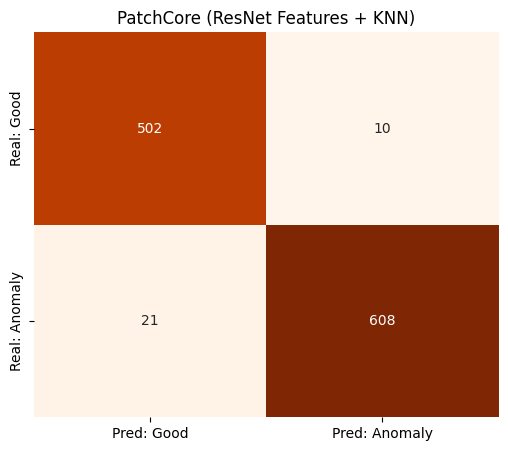

              precision    recall  f1-score   support

        Good       0.96      0.98      0.97       512
     Anomaly       0.98      0.97      0.98       629

    accuracy                           0.97      1141
   macro avg       0.97      0.97      0.97      1141
weighted avg       0.97      0.97      0.97      1141

🔥 Recall PatchCore: 96.66%


In [80]:
from torchvision import models
from sklearn.neighbors import NearestNeighbors
import numpy as np
import torch
import torch.nn as nn
from tqdm import tqdm
from sklearn.metrics import roc_curve, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. PREPARAR EXTRACTOR (ResNet) ---
class FeatureExtractor(nn.Module):
    def __init__(self):
        super(FeatureExtractor, self).__init__()
        backbone = models.resnet18(pretrained=True)
        # Nos quedamos hasta la layer 3 (buen equilibrio entre textura y semántica)
        self.features = nn.Sequential(*list(backbone.children())[:-3])
        self.eval() 
        
    def forward(self, x):
        with torch.no_grad():
            return self.features(x)

# Asegúrate de que 'device' está definido
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
extractor = FeatureExtractor().to(device)

# --- 2. CREAR BANCO DE MEMORIA (TRAIN) ---
# Usamos loader_train_ae (o el loader que tenga SOLO imágenes buenas)
memory_bank = []
print("🧠 Extrayendo características de TRAIN para PatchCore...")

subsample_ratio = 0.1 # Guardamos solo el 10% para no saturar RAM

# Asumimos que loader_train_ae devuelve solo imágenes (si devuelve img, label, ajusta esto)
for batch in tqdm(loader_train_ae):
    # Si el loader devuelve (img, label), desempaquetamos. Si solo img, lo tomamos directo.
    if isinstance(batch, list) or isinstance(batch, tuple):
        img = batch[0]
    else:
        img = batch
        
    img = img.to(device)
    
    # 1. Extraer features 
    features = extractor(img) 
    
    # 2. Aplanar: (Batch, C, H, W) -> (Batch*H*W, C)
    B, C, H, W = features.shape
    features = features.permute(0, 2, 3, 1).reshape(-1, C).cpu().numpy()
    
    # 3. Subsampling
    n_vectors = features.shape[0]
    if n_vectors > 0:
        indices = np.random.choice(n_vectors, int(n_vectors * subsample_ratio), replace=False)
        memory_bank.append(features[indices])

memory_bank = np.vstack(memory_bank)
print(f"✅ Memoria creada. Vectores almacenados: {memory_bank.shape}")

# --- 3. ENTRENAR KNN (CORREGIDO) ---
print("🔍 Entrenando KNN...")

# AQUÍ ESTABA EL ERROR: Cambiamos 'invsort' por 'auto' (o 'brute')
knn = NearestNeighbors(n_neighbors=1, algorithm='auto', metric='euclidean')
knn.fit(memory_bank)

# --- 4. EVALUACIÓN (TEST) ---
print("🕵️ Evaluando en TEST...")
test_scores = []
test_labels_real = []

# Usamos loader_test_ae. Si este loader tiene batch_size=1 es ideal.
# Necesitamos iterar img a img para emparejar con y_test
for i, batch in enumerate(tqdm(loader_test_ae)):
    if isinstance(batch, list) or isinstance(batch, tuple):
        img = batch[0]
    else:
        img = batch
        
    img = img.to(device)
    
    # 1. Extraer
    features = extractor(img)
    B, C, H, W = features.shape
    features_flat = features.permute(0, 2, 3, 1).reshape(-1, C).cpu().numpy() (parches de la foto nueva)
    
    # 2. Buscar vecino más cercano
    distances, _ = knn.kneighbors(features_flat)
    
    # 3. Score = Distancia del parche más lejano
    if len(distances) > 0:
        image_score = np.max(distances)
    else:
        image_score = 0
        
    test_scores.append(image_score)
    # Usamos la etiqueta real correspondiente de tu lista y_test
    test_labels_real.append(y_test[i])

# --- 5. RESULTADOS ---
# Calcular umbral óptimo
fpr, tpr, thresholds = roc_curve(test_labels_real, test_scores)
optimal_idx = np.argmax(tpr - fpr)
umbral_patchcore = thresholds[optimal_idx]

print(f"⚖️ Umbral óptimo: {umbral_patchcore:.4f}")

preds_patch = [1 if s > umbral_patchcore else 0 for s in test_scores]

# Matriz
cm = confusion_matrix(test_labels_real, preds_patch)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=['Pred: Good', 'Pred: Anomaly'],
            yticklabels=['Real: Good', 'Real: Anomaly'])
plt.title('PatchCore (ResNet Features + KNN)')
plt.show()

print(classification_report(test_labels_real, preds_patch, target_names=['Good', 'Anomaly']))

recall = cm[1,1] / (cm[1,0] + cm[1,1])
print(f"🔥 Recall PatchCore: {recall:.2%}")

## Mejorar Autoencoder

In [85]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Bloque Residual Básico (Como en ResNet)
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, 
                               stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, 
                               stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, 
                          stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        out = F.leaky_relu(self.bn1(self.conv1(x)), 0.2)
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.leaky_relu(out, 0.2)
        return out

class ResidualAutoencoder(nn.Module):
    def __init__(self):
        super(ResidualAutoencoder, self).__init__()
        
        # --- ENCODER (Comprime) ---
        # Entrada: (3, 64, 64)
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2),
            
            # Bloques Residuales para profundizar
            ResidualBlock(32, 64, stride=2),  # -> (64, 32, 32)
            ResidualBlock(64, 128, stride=2), # -> (128, 16, 16)
            ResidualBlock(128, 256, stride=2),# -> (256, 8, 8)
            
            # Cuello de botella
            nn.Conv2d(256, 512, kernel_size=3, padding=1)
        )
        
        # --- DECODER (Reconstruye) ---
        self.decoder = nn.Sequential(
            # Upsampling con bloques residuales inversos (ConvTranspose + Residual)
            nn.ConvTranspose2d(512, 256, kernel_size=3, stride=1, padding=1),
            
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1), # 8->16
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),
            
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1), # 16->32
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2),
            
            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1), # 32->64
            nn.BatchNorm2d(32),
            nn.LeakyReLU(0.2),
            
            nn.Conv2d(32, 3, kernel_size=3, padding=1), # Salida final
            nn.Sigmoid() # Valores 0-1
        )

    def forward(self, x):
        z = self.encoder(x)
        reconstruction = self.decoder(z)
        return reconstruction

# Instanciar
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_res = ResidualAutoencoder().to(device)
print("🏗️ Autoencoder Residual listo.")

🏗️ Autoencoder Residual listo.


Entrenamiento con SSIM + L1

In [86]:
import torch.optim as optim
from torchmetrics.image import StructuralSimilarityIndexMeasure

# Configuración
optimizer = optim.Adam(model_res.parameters(), lr=0.0002) # LR bajo para precisión
l1_loss = nn.L1Loss()
ssim = StructuralSimilarityIndexMeasure(data_range=1.0).to(device)

print("🔥 Entrenando Autoencoder Residual (SSIM + L1)...")

epochs = 30 # Dale más épocas, es una red más profunda
history_loss = []

for epoch in range(epochs):
    model_res.train()
    train_loss = 0.0
    
    # IMPORTANTE: Entrena SOLO con loader_train_ae (imágenes buenas)
    for img in loader_train_ae:
        img = img.to(device)
        
        # 1. Forward
        recon = model_res(img)
        
        # 2. Loss Mixta (La fórmula ganadora)
        loss_l1 = l1_loss(recon, img)
        loss_ssim = 1 - ssim(recon, img) # Queremos maximizar SSIM, o sea minimizar (1-SSIM)
        
        # Peso: Damos mucha importancia a la textura (SSIM)
        loss = (0.3 * loss_l1) + (0.7 * loss_ssim)
        
        # 3. Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        
    avg_loss = train_loss / len(loader_train_ae)
    history_loss.append(avg_loss)
    print(f"   Época {epoch+1}/{epochs} | Loss: {avg_loss:.6f}")

print("✅ Entrenamiento finalizado.")

🔥 Entrenando Autoencoder Residual (SSIM + L1)...
   Época 1/30 | Loss: 0.242136
   Época 2/30 | Loss: 0.093041
   Época 3/30 | Loss: 0.069022
   Época 4/30 | Loss: 0.060034
   Época 5/30 | Loss: 0.050659
   Época 6/30 | Loss: 0.044156
   Época 7/30 | Loss: 0.039378
   Época 8/30 | Loss: 0.034843
   Época 9/30 | Loss: 0.033223
   Época 10/30 | Loss: 0.031325
   Época 11/30 | Loss: 0.030042
   Época 12/30 | Loss: 0.030418
   Época 13/30 | Loss: 0.025785
   Época 14/30 | Loss: 0.025789
   Época 15/30 | Loss: 0.026079
   Época 16/30 | Loss: 0.022223
   Época 17/30 | Loss: 0.021989
   Época 18/30 | Loss: 0.020263
   Época 19/30 | Loss: 0.019602
   Época 20/30 | Loss: 0.021234
   Época 21/30 | Loss: 0.019969
   Época 22/30 | Loss: 0.017778
   Época 23/30 | Loss: 0.017360
   Época 24/30 | Loss: 0.017373
   Época 25/30 | Loss: 0.016489
   Época 26/30 | Loss: 0.015987
   Época 27/30 | Loss: 0.016239
   Época 28/30 | Loss: 0.016417
   Época 29/30 | Loss: 0.015025
   Época 30/30 | Loss: 0.015413


🕵️ Evaluando Autoencoder Residual (Calculando scores L1 + SSIM)...
⚖️ Umbral óptimo calculado: 0.02347


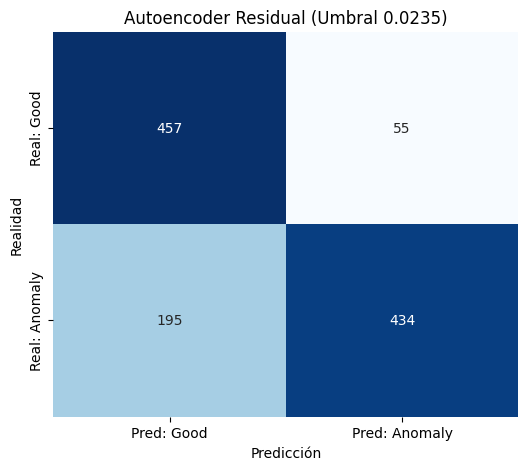


--- RESULTADOS AUTOENCODER RESIDUAL ---
              precision    recall  f1-score   support

        Good       0.70      0.89      0.79       512
     Anomaly       0.89      0.69      0.78       629

    accuracy                           0.78      1141
   macro avg       0.79      0.79      0.78      1141
weighted avg       0.80      0.78      0.78      1141

❌ Defectos escapados: 195 de 629
🔥 Recall (Capacidad de detectar fallos): 69.00%


In [87]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, classification_report, confusion_matrix
# Asegúrate de tener torchmetrics (si no: pip install torchmetrics)
from torchmetrics.image import StructuralSimilarityIndexMeasure

# --- 1. CONFIGURACIÓN DE EVALUACIÓN ---
print("🕵️ Evaluando Autoencoder Residual (Calculando scores L1 + SSIM)...")

model_res.eval()
l1_crit = torch.nn.L1Loss()
ssim_metric = StructuralSimilarityIndexMeasure(data_range=1.0).to(device)

errores_res = []
# Usaremos y_test directamente (asumiendo que existe de pasos anteriores)
# Si no existiera, habría que extraerlo del loader si este tuviera etiquetas.
etiquetas_reales = y_test 

with torch.no_grad():
    # Iteramos por el loader de test
    for i, img in enumerate(loader_test_ae):
        img = img.to(device)
        
        # 1. Reconstruir
        recon = model_res(img)
        
        # 2. Calcular el Score de Anomalía (Misma fórmula que el entrenamiento)
        loss_l1 = l1_crit(recon, img)
        ssim_val = ssim_metric(recon, img)
        loss_ssim = 1 - ssim_val
        
        # Score final (Pesos: 30% Color, 70% Textura)
        score = (0.3 * loss_l1) + (0.7 * loss_ssim)
        
        errores_res.append(score.item())

# --- 2. CALCULAR UMBRAL ÓPTIMO (ROC CURVE) ---
# Buscamos el punto de corte que mejor separa las dos montañas (Good vs Anomaly)
fpr, tpr, thresholds = roc_curve(etiquetas_reales, errores_res)
optimal_idx = np.argmax(tpr - fpr)
best_threshold = thresholds[optimal_idx]

print(f"⚖️ Umbral óptimo calculado: {best_threshold:.5f}")

# --- 3. GENERAR PREDICCIONES ---
# Si el error es mayor que el umbral -> Anomalía (1)
preds_optimos = [1 if e > best_threshold else 0 for e in errores_res]

# --- 4. VISUALIZACIÓN DE RESULTADOS ---
cm = confusion_matrix(etiquetas_reales, preds_optimos)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Pred: Good', 'Pred: Anomaly'],
            yticklabels=['Real: Good', 'Real: Anomaly'])
plt.title(f'Autoencoder Residual (Umbral {best_threshold:.4f})')
plt.ylabel('Realidad')
plt.xlabel('Predicción')
plt.show()

# --- 5. REPORTE FINAL ---
print("\n--- RESULTADOS AUTOENCODER RESIDUAL ---")
print(classification_report(etiquetas_reales, preds_optimos, target_names=['Good', 'Anomaly']))

fallos = cm[1, 0]
total_anom = cm[1, 0] + cm[1, 1]
recall = cm[1, 1] / total_anom

print(f"❌ Defectos escapados: {fallos} de {total_anom}")
print(f"🔥 Recall (Capacidad de detectar fallos): {recall:.2%}")